In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import time
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def loader_data(directed):
    
    # Load the explored values of n
    N = np.load('results/sizes.npy')
    print(N)
    
    # check the directed value
    if directed: lab = ''
    else: lab = '_und'
        
    # reading from keys
    with open("results/keys.txt", "r") as f:
        keys = eval(f.read())
    
    # STATS
    stats = {}
    # reading dataframes
    for n in N:
        stats[n] = {}
        for key in keys:
            stats[n][key] = pd.read_csv("results/stats{}_{}_{}.csv".format(lab, n, str(key)))
        
    # DATA
    data = {}
    # reading dataframes
    for n in N:
        data[n] = {}
        for key in keys:
            data[n][key] = [pd.read_csv("results/data{}_{}_{}_metrics.csv".format(lab, n, str(key))),
                         pd.read_csv("results/data{}_{}_{}_levels.csv".format(lab, n, str(key)))]

    return stats, data

In [3]:
stats_dir, data_dir = loader_data(True)
stats_und, data_und = loader_data(False)

[1000]
[1000]


## Results

The graph will be disconnected for values < log(n)/n (sharp phase transition for P: G is connected)

For n = 10^3, this threshold is approximately 0.007

NB: this visualization in valid only for the preliminary results.


In [4]:
def plot_data(directed, data):
    
    if directed: 
        lab = 'directed'
    else : lab = 'undirected'  
    
    fig, axs = plt.subplots(7,2,figsize = (20,40))
    
    for i, k in enumerate(data.keys()):
        axs[i,0].set_title('Metrics with p = {}'.format(k))
        data[k][0].boxplot(ax=axs[i,0])
        axs[i,1].set_title('Levels with p = {}'.format(k))
        data[k][1].boxplot(ax=axs[i,1])    

    plt.savefig('images/box_{}.jpeg'.format(lab))
    
    return

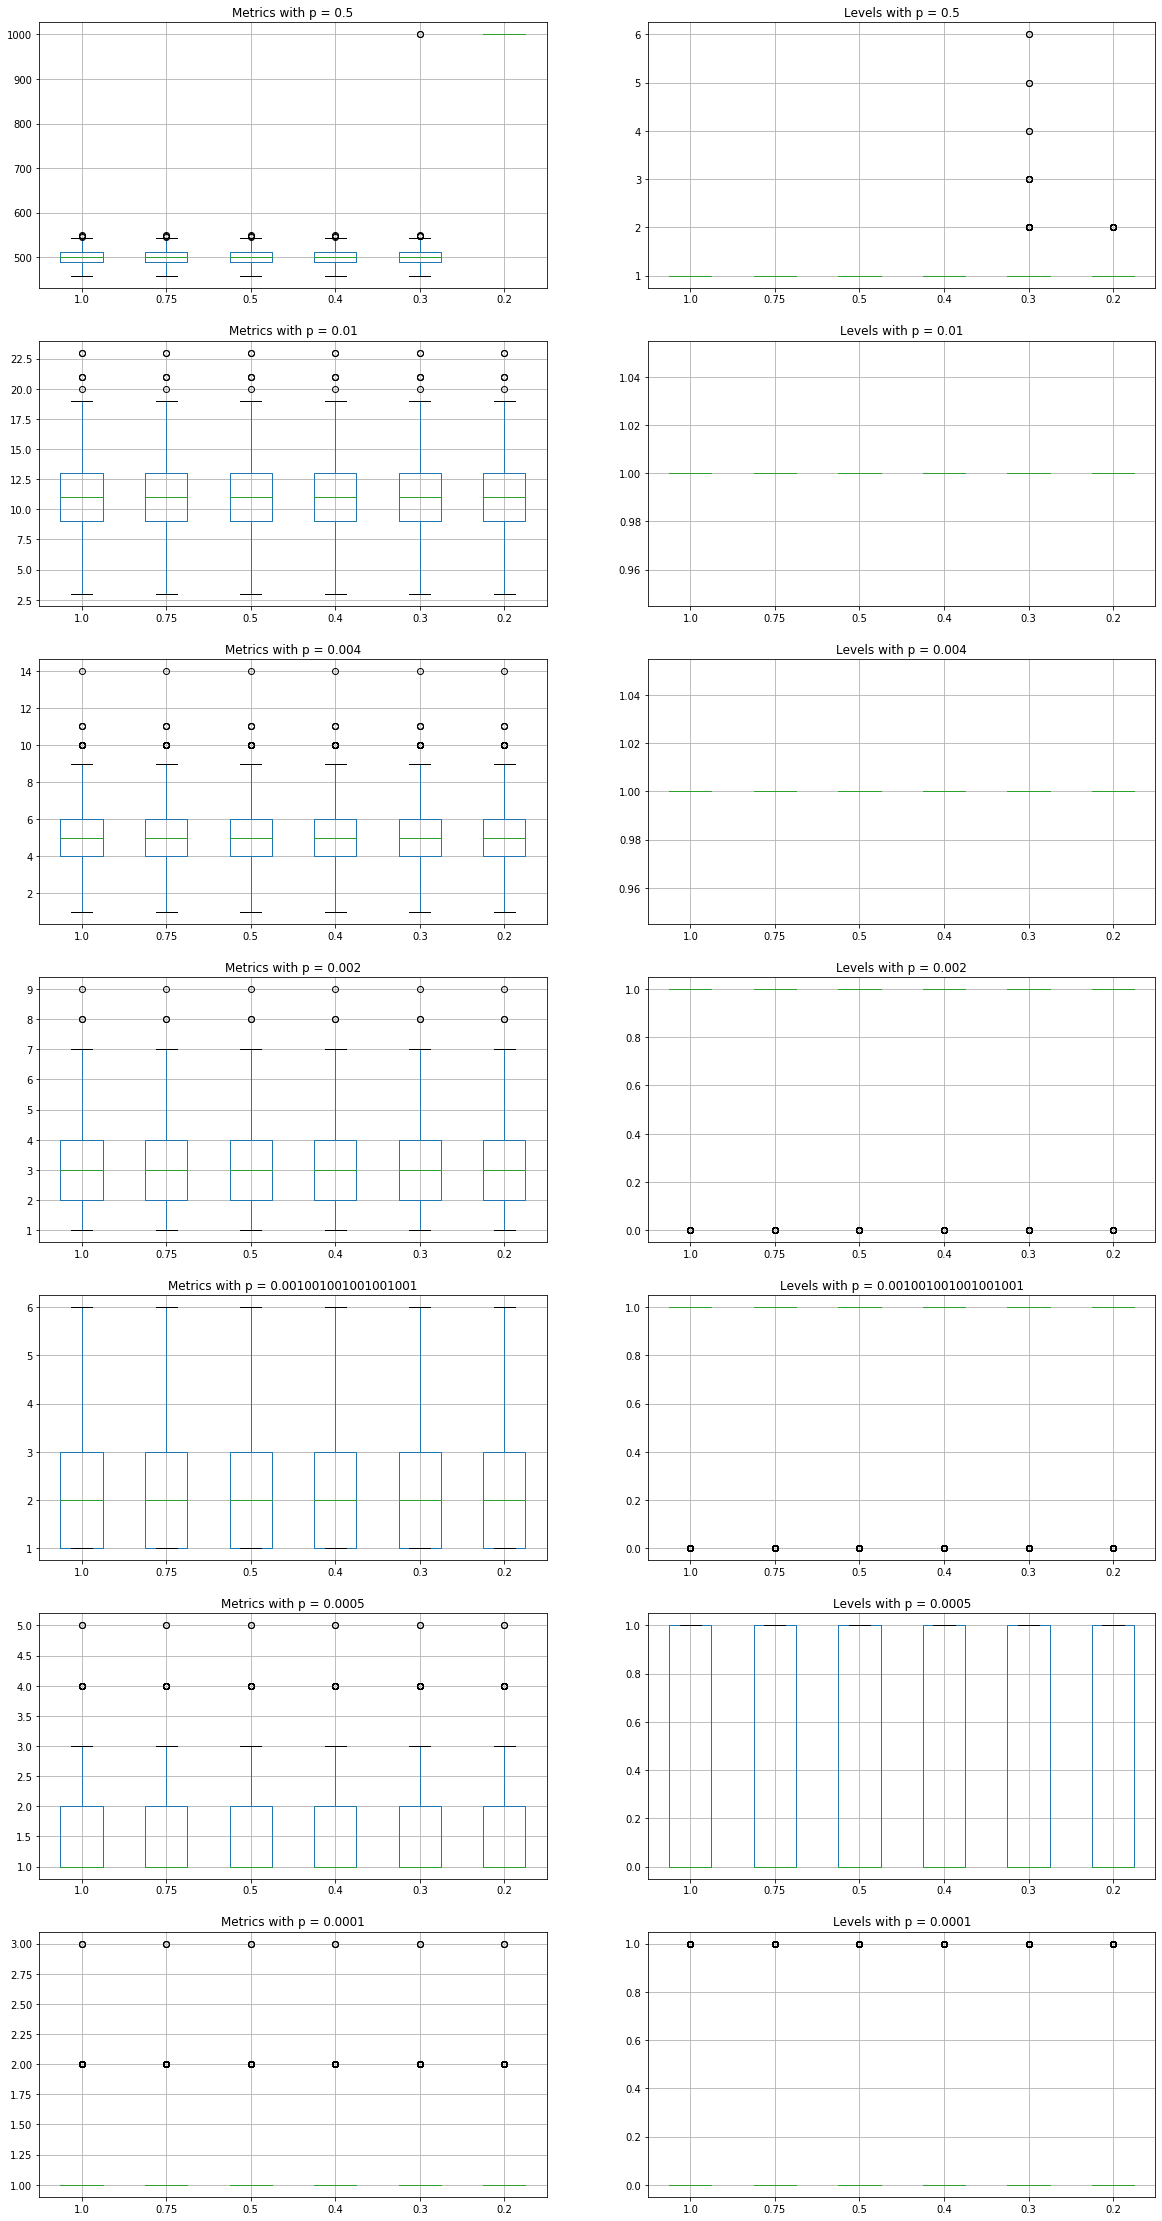

In [5]:
plot_data(True, data_dir[1000])

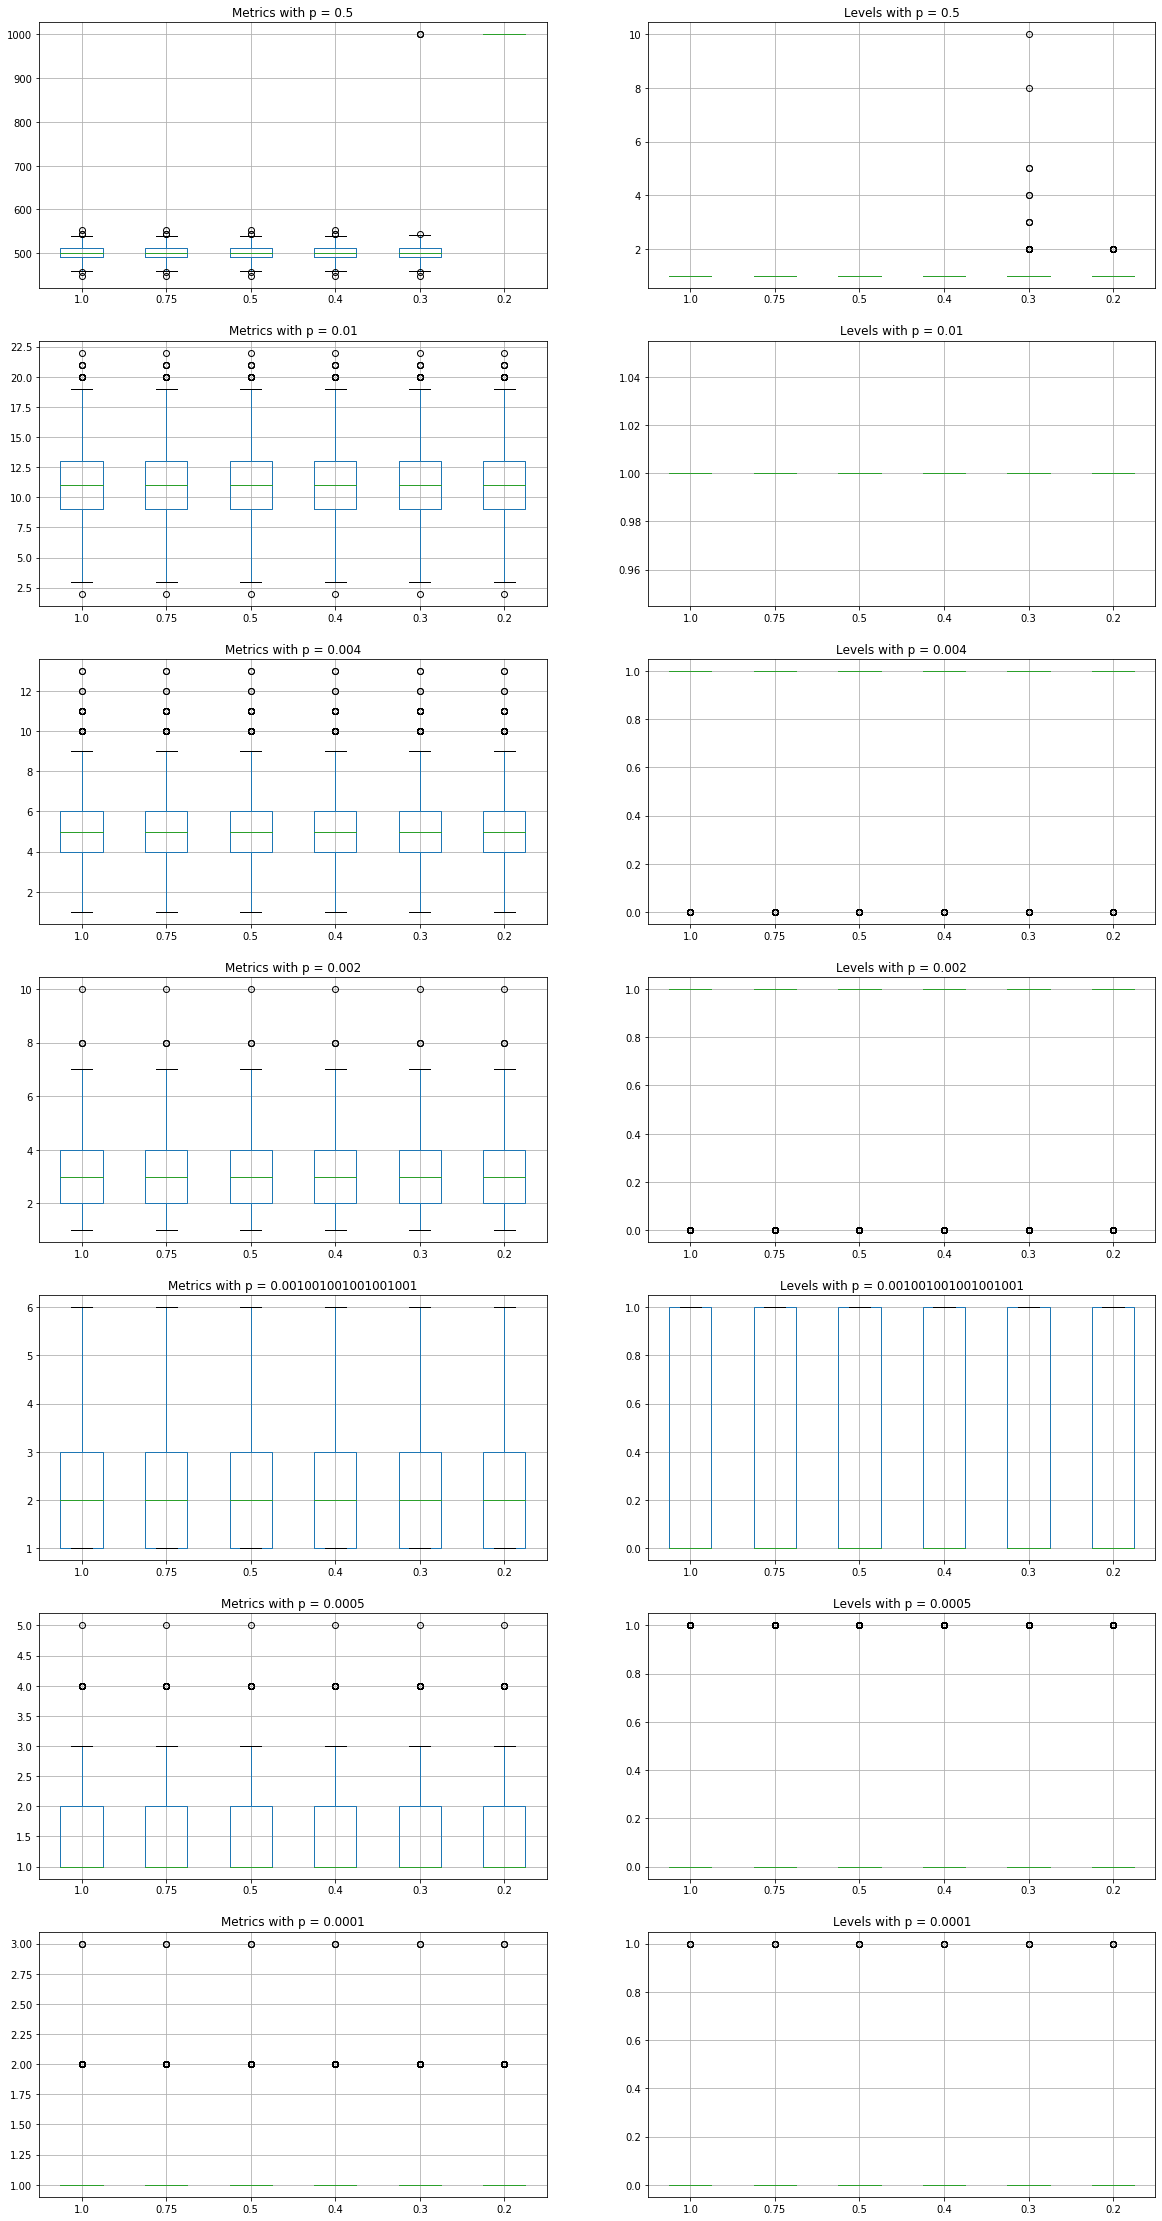

In [6]:
plot_data(False, data_und[1000])

In [7]:
def plot_stats(directed, data):
    
    if directed: 
        lab = 'directed'
    else : lab = 'undirected'  
    
    fig, axs = plt.subplots(7,2,figsize = (20,40))
    
    for i, k in enumerate(data.keys()):
        axs[i,0].set_title('AVG Metrics with p = {}'.format(k))
        data[k].plot(kind='line',x='res',y='avg_FLTR',ax=axs[i,0])
        axs[i,1].set_title('AVG Levels with p = {}'.format(k))
        data[k].plot(kind='line',x='res',y='avg_exp_level',ax=axs[i,1])    

    plt.savefig('images/statsplot_{}.jpeg'.format(lab))

In [8]:
print("### DIRECTED ###", end = "\n\n")
for k in stats_dir[1000].keys():
    print("Gnp with p = ", k)
    print(stats_dir[1000][k], end = "\n\n")

### DIRECTED ###

Gnp with p =  0.5
    res  avg_FLTR  avg_exp_level
0  1.00   500.681          1.000
1  0.75   500.681          1.000
2  0.50   500.681          1.000
3  0.40   500.681          1.000
4  0.30   501.677          1.069
5  0.20  1000.000          1.017

Gnp with p =  0.01
    res  avg_FLTR  avg_exp_level
0  1.00    10.957            1.0
1  0.75    10.957            1.0
2  0.50    10.957            1.0
3  0.40    10.957            1.0
4  0.30    10.957            1.0
5  0.20    10.957            1.0

Gnp with p =  0.004
    res  avg_FLTR  avg_exp_level
0  1.00      5.09            1.0
1  0.75      5.09            1.0
2  0.50      5.09            1.0
3  0.40      5.09            1.0
4  0.30      5.09            1.0
5  0.20      5.09            1.0

Gnp with p =  0.002
    res  avg_FLTR  avg_exp_level
0  1.00     2.965          0.977
1  0.75     2.965          0.977
2  0.50     2.965          0.977
3  0.40     2.965          0.977
4  0.30     2.965          0.977
5  0.20    

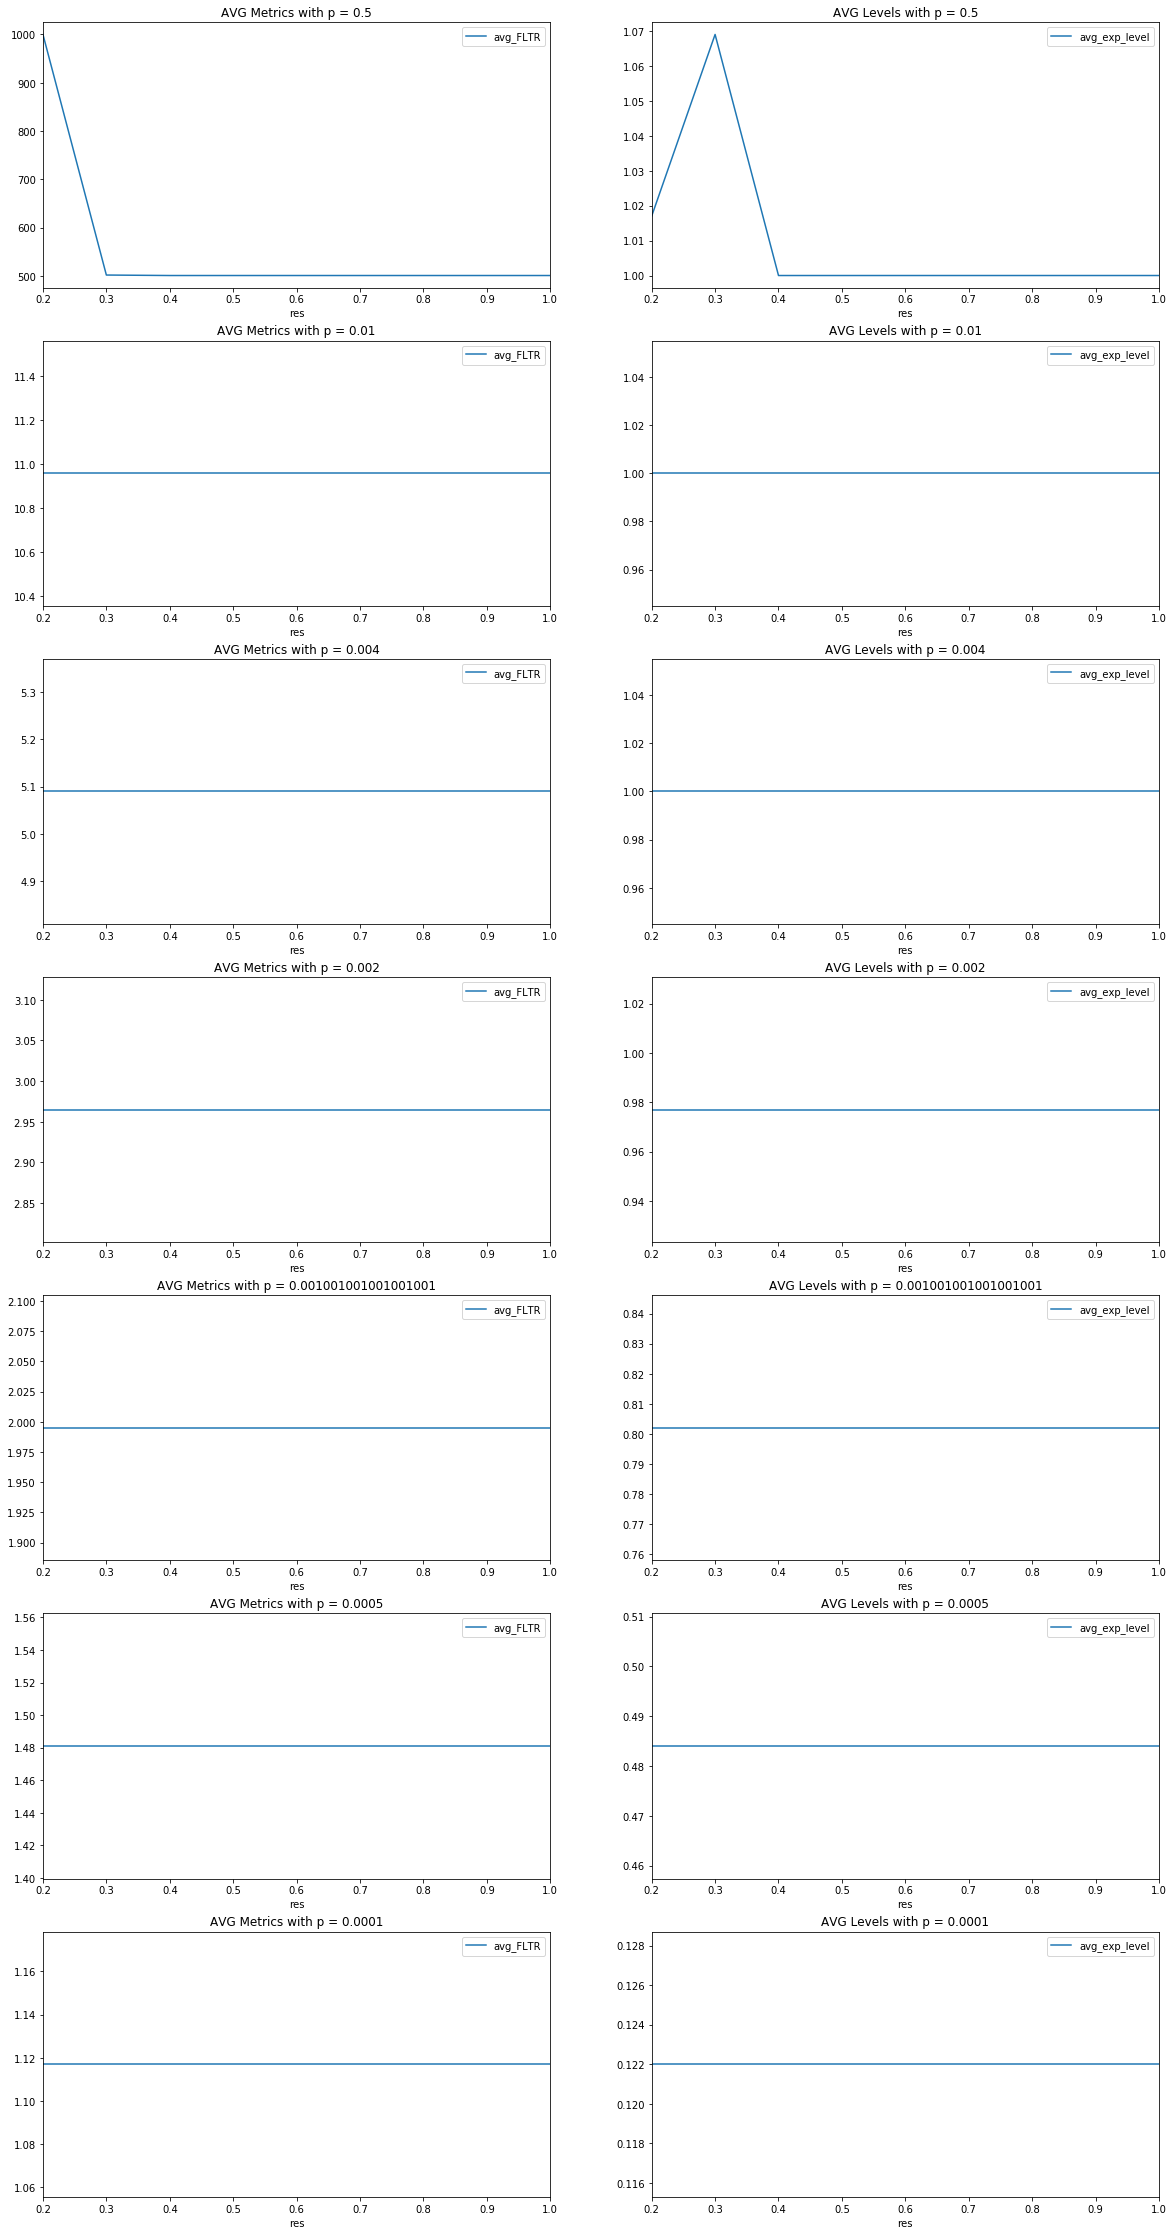

In [9]:
plot_stats(True, stats_dir[1000])

In [10]:
print("### UNDIRECTED ###", end = "\n\n")

for k in stats_und[1000].keys():
    print("Gnp with p = ", k)
    print(stats_und[1000][k], end = "\n\n")

### UNDIRECTED ###

Gnp with p =  0.5
    res  avg_FLTR  avg_exp_level
0  1.00   501.308          1.000
1  0.75   501.308          1.000
2  0.50   501.308          1.000
3  0.40   501.308          1.000
4  0.30   502.718          1.062
5  0.20  1000.000          1.023

Gnp with p =  0.01
    res  avg_FLTR  avg_exp_level
0  1.00    11.072            1.0
1  0.75    11.072            1.0
2  0.50    11.072            1.0
3  0.40    11.072            1.0
4  0.30    11.072            1.0
5  0.20    11.072            1.0

Gnp with p =  0.004
    res  avg_FLTR  avg_exp_level
0  1.00     5.058          0.981
1  0.75     5.058          0.981
2  0.50     5.058          0.981
3  0.40     5.058          0.981
4  0.30     5.058          0.981
5  0.20     5.058          0.981

Gnp with p =  0.002
    res  avg_FLTR  avg_exp_level
0  1.00     2.942          0.816
1  0.75     2.942          0.816
2  0.50     2.942          0.816
3  0.40     2.942          0.816
4  0.30     2.942          0.816
5  0.20  

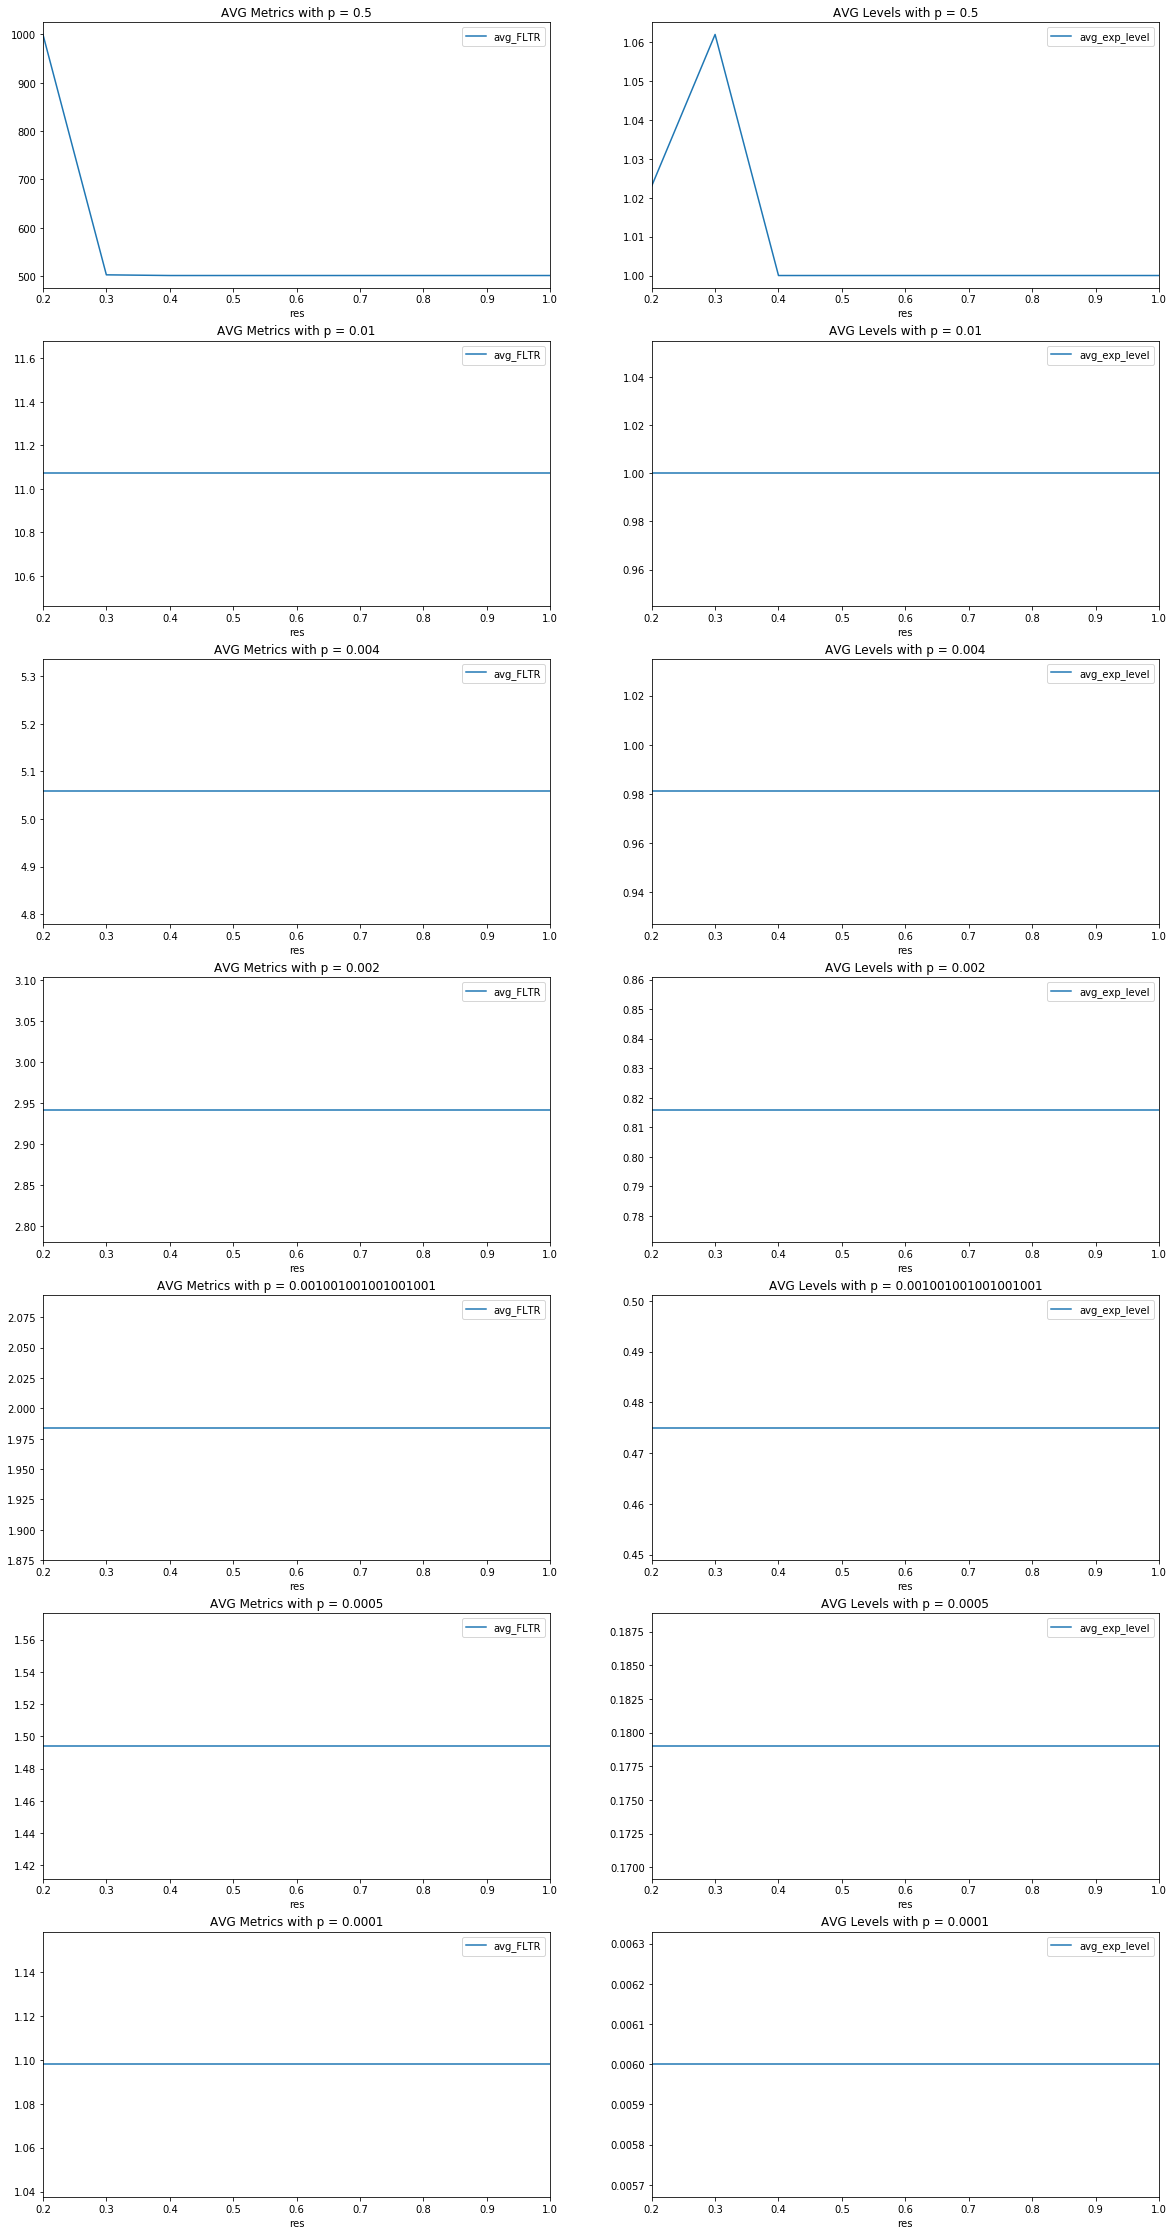

In [11]:
plot_stats(False, stats_und[1000])